In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
sns.set_theme()

### Manual ReLU Activation Function

<Axes: >

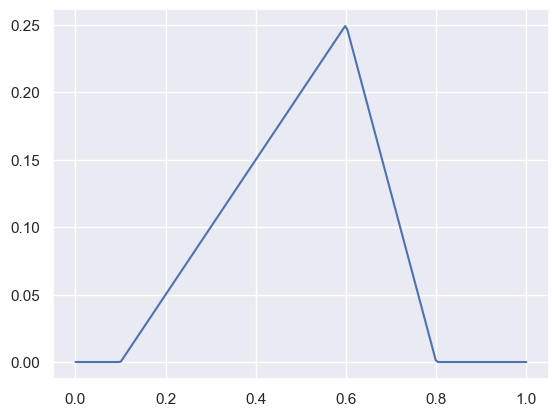

In [2]:
x = np.linspace(0,1,200)
y = np.zeros(len(x))

y[x<0.1] = 0 # y = 0 for x < 0.1
y[x>=0.1] = 0.5*(x[x>=0.1]-0.1) # Add a gradient of 0.5 for x > 0.1
y[x>=0.6] = 0.25-(0.25/0.2)*(x[x>=0.6]-0.6) # Downwards gradient from 0.6 to 0.8
y[x>0.8] = 0 # y = 0 for x > 0.8

sns.lineplot(x = x,y= y)

In [3]:
# Convert arrays to tensors and split into batches
x_tensor, y_tensor = torch.tensor(x, dtype=torch.float64).view(-1, 1), torch.tensor(y, dtype=torch.float64).view(-1, 1)
dataset = TensorDataset(x_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(1, 3, dtype=torch.float64),
    nn.ReLU(),
    nn.Linear(3, 1, dtype=torch.float64)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training data (assuming x and y are already defined as PyTorch tensors)
# ...

# Training loop
for epoch in range(1,200):
    for batch in data_loader:
        batch_x, batch_y = batch
        # Forward pass
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch}/200], Loss: {loss.item()}')


Epoch [10/200], Loss: 0.008147916489582137
Epoch [20/200], Loss: 0.007435651254343835
Epoch [30/200], Loss: 0.005058899968826232
Epoch [40/200], Loss: 0.006675995827206125
Epoch [50/200], Loss: 0.005361178591580864
Epoch [60/200], Loss: 0.00480809742241463
Epoch [70/200], Loss: 0.0035569215242133266
Epoch [80/200], Loss: 0.0023206691015708342
Epoch [90/200], Loss: 0.0045291855367403265
Epoch [100/200], Loss: 0.0031445915618917445
Epoch [110/200], Loss: 0.003196471973004855
Epoch [120/200], Loss: 0.005368585739349779
Epoch [130/200], Loss: 0.0016530648109328336
Epoch [140/200], Loss: 0.004373439972645194
Epoch [150/200], Loss: 0.0012294386405922804
Epoch [160/200], Loss: 0.0015730072254527168
Epoch [170/200], Loss: 0.0017773057668410495
Epoch [180/200], Loss: 0.003645498514851533
Epoch [190/200], Loss: 0.0008482050292618541


In [4]:
# After training is complete
model.eval()  # Set the model to evaluation mode

# Store all predictions
y_pred = []

with torch.no_grad():  # Disable gradient computation
    y_pred = model(x_tensor)

# Reshape if necessary (to match the original y_tensor shape, if needed)
y_pred = y_pred.view(-1)


<Axes: >

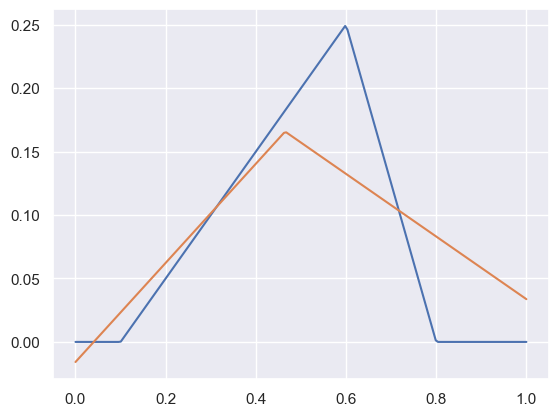

In [5]:
sns.lineplot(x = x,y= y)
sns.lineplot(x = x, y=  y_pred.detach().numpy())

### Manually setting weights to get the right answers

In [6]:
layer_1_weight = torch.tensor(np.array([[0.5,-(-0.5-0.25/0.2), 0.25/0.2]]).transpose())
layer_1_bias = torch.tensor(np.array([[-0.5*0.1, (-0.5-0.25/0.2)*0.6, -(0.25/0.2)*0.8]]), )
layer_2_weight = torch.tensor(np.array([[1],[-1],[1]]).transpose(), dtype=torch.float64)
layer_2_bias = torch.tensor(np.array([0]), dtype = torch.float64)
model[0].weight = nn.Parameter(layer_1_weight)
model[0].bias = nn.Parameter(layer_1_bias)
model[2].weight = nn.Parameter(layer_2_weight)
model[2].bias = nn.Parameter(layer_2_bias)

In [7]:
# After training is complete
model.eval()  # Set the model to evaluation mode

# Store all predictions
y_pred = []

with torch.no_grad():  # Disable gradient computation
    y_pred = model(x_tensor)

# Reshape if necessary (to match the original y_tensor shape, if needed)
y_pred = y_pred.view(-1)

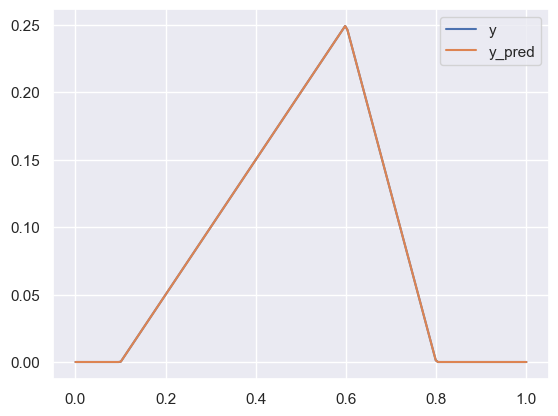

In [8]:
true_plot = sns.lineplot(x = x,y= y, label = 'y')
pred_plot = sns.lineplot(x = x, y=  y_pred.detach().numpy(), label = 'y_pred')

### Trying again with more nodes and epochs

In [9]:
# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(1, 150, dtype=torch.float64),
    nn.ReLU(),
    nn.Linear(150, 1, dtype=torch.float64)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training data (assuming x and y are already defined as PyTorch tensors)
# ...

# Training loop
for epoch in range(1,2000):
    for batch in data_loader:
        batch_x, batch_y = batch
        # Forward pass
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch}/2000], Loss: {loss.item()}')


Epoch [10/200], Loss: 0.003042210386202707
Epoch [20/200], Loss: 0.0006003230800584462
Epoch [30/200], Loss: 0.0006027484205942498
Epoch [40/200], Loss: 0.0006466135629650753
Epoch [50/200], Loss: 0.0004001779345463084
Epoch [60/200], Loss: 0.0007113582590086135
Epoch [70/200], Loss: 0.00042345416058345834
Epoch [80/200], Loss: 0.0006106074788797443
Epoch [90/200], Loss: 0.0001378365186707953
Epoch [100/200], Loss: 9.662864335115926e-05
Epoch [110/200], Loss: 8.698695009412933e-05
Epoch [120/200], Loss: 0.00010246600533752964
Epoch [130/200], Loss: 1.0798514405867763e-05
Epoch [140/200], Loss: 7.083565805662068e-05
Epoch [150/200], Loss: 3.191266563954233e-05
Epoch [160/200], Loss: 2.5741021840218456e-05
Epoch [170/200], Loss: 5.882109799657405e-05
Epoch [180/200], Loss: 9.072815705786663e-06
Epoch [190/200], Loss: 1.822417934729295e-05
Epoch [200/200], Loss: 8.625567092691075e-06
Epoch [210/200], Loss: 5.3209791433586894e-06
Epoch [220/200], Loss: 1.4856396436621724e-06
Epoch [230/200

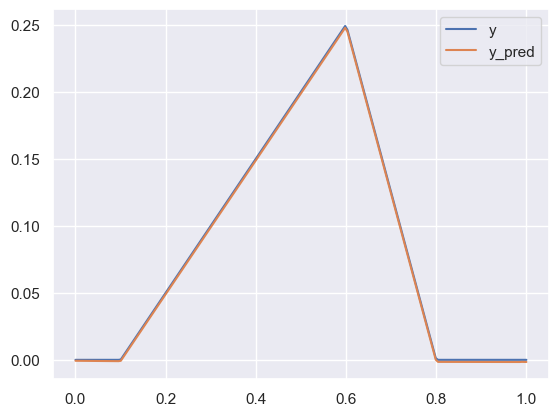

In [10]:
# After training is complete
model.eval()  # Set the model to evaluation mode

# Store all predictions
y_pred = []

with torch.no_grad():  # Disable gradient computation
    y_pred = model(x_tensor)

# Reshape if necessary (to match the original y_tensor shape, if needed)
y_pred = y_pred.view(-1)

true_plot = sns.lineplot(x = x,y= y, label = 'y')
pred_plot = sns.lineplot(x = x, y=  y_pred.detach().numpy(), label = 'y_pred')

### Trying different activation functions

In [21]:
# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(1, 150, dtype=torch.float64),
    nn.Sigmoid(),
    nn.Linear(150, 1, dtype=torch.float64)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training data (assuming x and y are already defined as PyTorch tensors)
# ...

# Training loop
for epoch in range(1,n:=500):
    for batch in data_loader:
        batch_x, batch_y = batch
        # Forward pass
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch}/{n}], Loss: {loss.item()}')


Epoch [10/500], Loss: 0.005794054563316146
Epoch [20/500], Loss: 0.010415783591214126
Epoch [30/500], Loss: 0.015021638030446056
Epoch [40/500], Loss: 0.006073835995786118
Epoch [50/500], Loss: 0.00428254974075234
Epoch [60/500], Loss: 0.010902031729862708
Epoch [70/500], Loss: 0.004724974500310959
Epoch [80/500], Loss: 0.005304126310389802
Epoch [90/500], Loss: 0.006894879957204392
Epoch [100/500], Loss: 0.007137050607370649
Epoch [110/500], Loss: 0.004587582853575668
Epoch [120/500], Loss: 0.005912654594194397
Epoch [130/500], Loss: 0.0119170595570465
Epoch [140/500], Loss: 0.005799631908586699
Epoch [150/500], Loss: 0.00718081418845304
Epoch [160/500], Loss: 0.005217023087498925
Epoch [170/500], Loss: 0.00782672209215412
Epoch [180/500], Loss: 0.008761395299241416
Epoch [190/500], Loss: 0.00722171747463228
Epoch [200/500], Loss: 0.005851228744829164
Epoch [210/500], Loss: 0.007613870227602686
Epoch [220/500], Loss: 0.0069419286750937986
Epoch [230/500], Loss: 0.009922191723437826
Ep

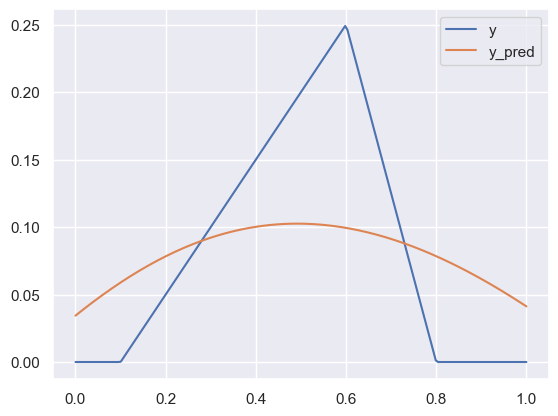

In [22]:
# After training is complete
model.eval()  # Set the model to evaluation mode

# Store all predictions
y_pred = []

with torch.no_grad():  # Disable gradient computation
    y_pred = model(x_tensor)

# Reshape if necessary (to match the original y_tensor shape, if needed)
y_pred = y_pred.view(-1)

true_plot = sns.lineplot(x = x,y= y, label = 'y')
pred_plot = sns.lineplot(x = x, y=  y_pred.detach().numpy(), label = 'y_pred')

### Adding more hidden layers

In [25]:
# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(1, 10, dtype=torch.float64),
    nn.Tanh(),
    nn.Linear(10, 10, dtype=torch.float64),
    nn.Tanh(),
    nn.Linear(10, 10, dtype=torch.float64),
    nn.Tanh(),
    nn.Linear(10, 1, dtype=torch.float64)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training data (assuming x and y are already defined as PyTorch tensors)
# ...

# Training loop
for epoch in range(1,n:=2000):
    for batch in data_loader:
        batch_x, batch_y = batch
        # Forward pass
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch}/{n}], Loss: {loss.item()}')


Epoch [10/2000], Loss: 0.0034764624888464824
Epoch [20/2000], Loss: 0.004826819347657968
Epoch [30/2000], Loss: 0.005727740572939104
Epoch [40/2000], Loss: 0.007321816005549228
Epoch [50/2000], Loss: 0.005891886045017725
Epoch [60/2000], Loss: 0.0030874026679907564
Epoch [70/2000], Loss: 0.0023509343770303785
Epoch [80/2000], Loss: 0.006302177018626269
Epoch [90/2000], Loss: 0.0015909328833793668
Epoch [100/2000], Loss: 0.0016187104536941747
Epoch [110/2000], Loss: 0.0010623510888470565
Epoch [120/2000], Loss: 0.001554144807730092
Epoch [130/2000], Loss: 6.938372936105493e-05
Epoch [140/2000], Loss: 0.0006235401361167543
Epoch [150/2000], Loss: 0.0013962155739889728
Epoch [160/2000], Loss: 0.000826232035435884
Epoch [170/2000], Loss: 0.0006915496892684054
Epoch [180/2000], Loss: 0.0006763367141012643
Epoch [190/2000], Loss: 0.00039124576623647273
Epoch [200/2000], Loss: 0.0006955498941529166
Epoch [210/2000], Loss: 0.0002992006513133154
Epoch [220/2000], Loss: 0.0009165523772638627
Epo

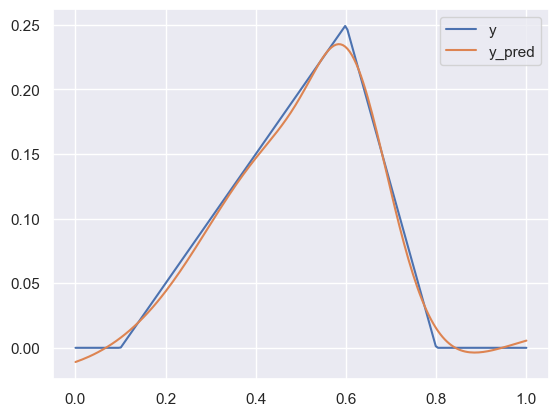

In [26]:
# After training is complete
model.eval()  # Set the model to evaluation mode

# Store all predictions
y_pred = []

with torch.no_grad():  # Disable gradient computation
    y_pred = model(x_tensor)

# Reshape if necessary (to match the original y_tensor shape, if needed)
y_pred = y_pred.view(-1)

true_plot = sns.lineplot(x = x,y= y, label = 'y')
pred_plot = sns.lineplot(x = x, y=  y_pred.detach().numpy(), label = 'y_pred')